In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv('salary.txt', sep='\s+')
df_95 = df[df['year'] == 95].copy()

In [32]:
df.head()

,case,id,sex,deg,yrdeg,field,startyr,year,rank,admin,salary
0,1,1,F,Other,92,Other,95,95,Assist,0,6684.0
1,2,2,M,Other,91,Other,94,94,Assist,0,4743.0
2,3,2,M,Other,91,Other,94,95,Assist,0,4881.0
3,4,4,M,PhD,96,Other,95,95,Assist,0,4231.0
4,5,6,M,PhD,66,Other,91,91,Full,1,11182.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19792 entries, 0 to 19791
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   case     19792 non-null  int64  
 1   id       19792 non-null  int64  
 2   sex      19792 non-null  object 
 3   deg      19792 non-null  object 
 4   yrdeg    19792 non-null  int64  
 5   field    19792 non-null  object 
 6   startyr  19792 non-null  int64  
 7   year     19792 non-null  int64  
 8   rank     19788 non-null  object 
 9   admin    19792 non-null  int64  
 10  salary   19792 non-null  float64
dtypes: float64(1), int64(6), object(4)
memory usage: 1.7+ MB


In [34]:
df.isnull().sum()

case       0
id         0
sex        0
deg        0
yrdeg      0
field      0
startyr    0
year       0
rank       4
admin      0
salary     0
dtype: int64

In [35]:
cat_vars = ['field', 'rank']
num_vars = ['yrdeg', 'startyr', 'salary']

In [36]:
print("--- Summary Statistics (Aggregate) ---")
print(df_95[num_vars].describe())

--- Summary Statistics (Aggregate) ---
             yrdeg      startyr        salary
count  1597.000000  1597.000000   1597.000000
mean     76.094552    81.115842   6389.808113
std       9.857465     9.993217   2036.772757
min      48.000000    48.000000   3042.000000
25%      69.000000    73.000000   4743.000000
50%      76.000000    83.000000   5962.000000
75%      84.000000    90.000000   7602.000000
max      96.000000    95.000000  14464.000000


In [37]:
print("\n--- Summary Statistics Stratified by Sex ---")
print(df_95.groupby('sex')[num_vars].mean())


--- Summary Statistics Stratified by Sex ---
         yrdeg    startyr       salary
sex                                   
F    81.107579  85.474328  5396.908301
M    74.368687  79.615320  6731.639783


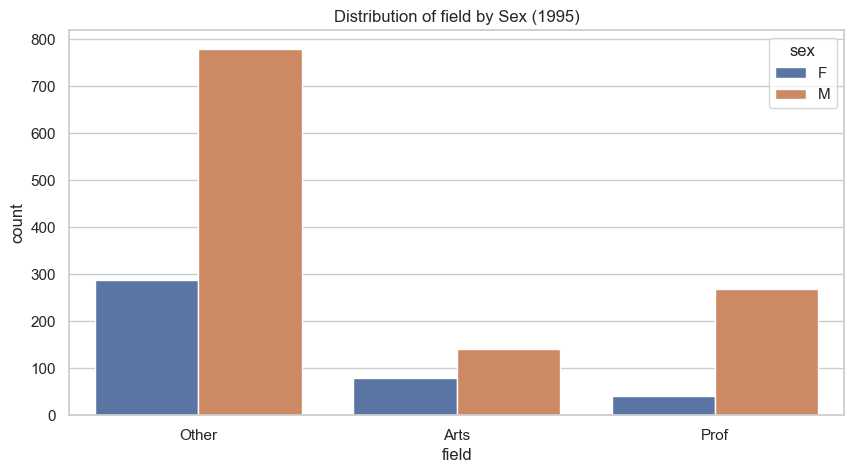

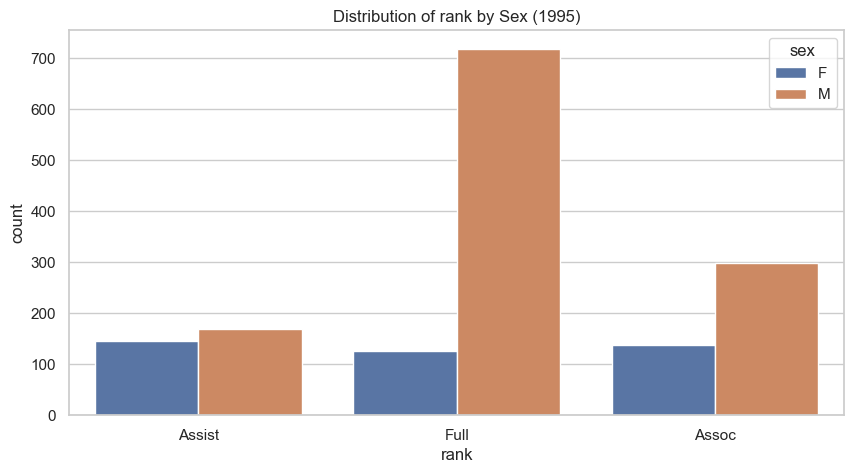

In [38]:
sns.set(style="whitegrid")
for var in cat_vars:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=df_95, x=var, hue='sex')
    plt.title(f'Distribution of {var} by Sex (1995)')
    plt.show()

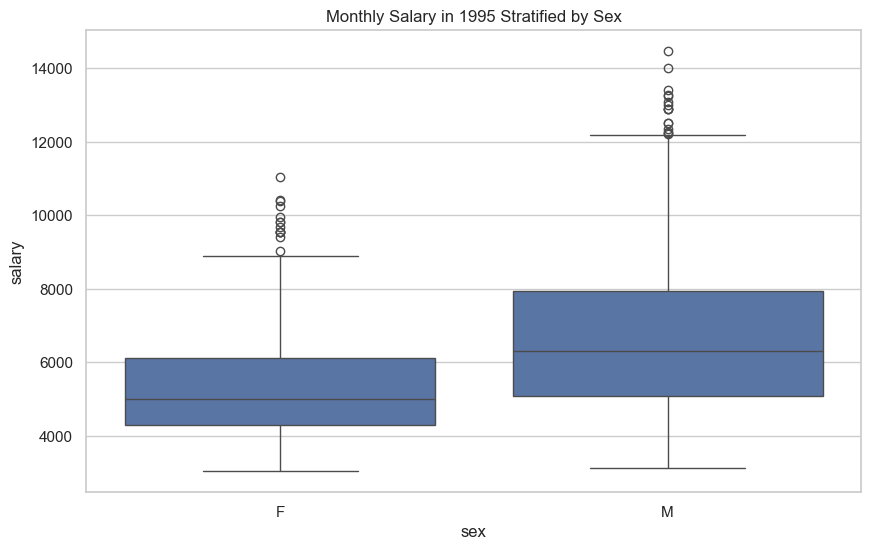

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_95, x='sex', y='salary')
plt.title('Monthly Salary in 1995 Stratified by Sex')
plt.show()

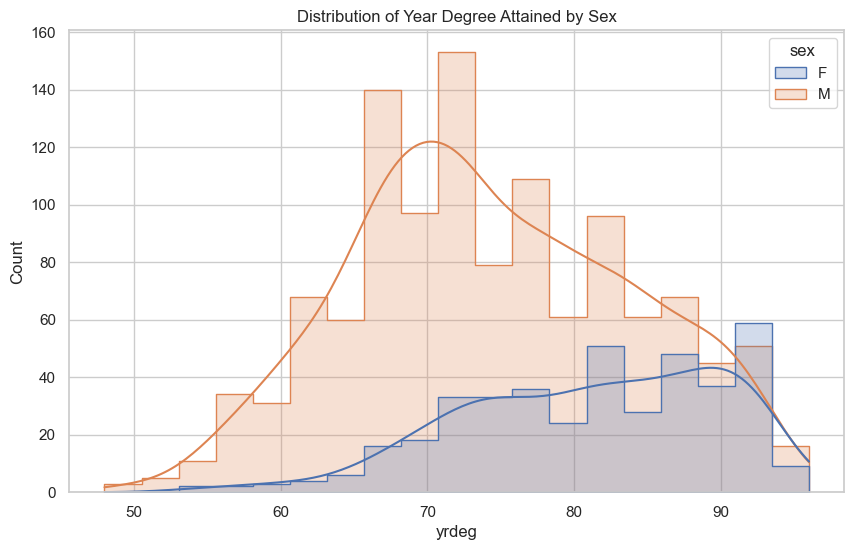

In [40]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_95, x='yrdeg', hue='sex', kde=True, element="step")
plt.title('Distribution of Year Degree Attained by Sex')
plt.show()

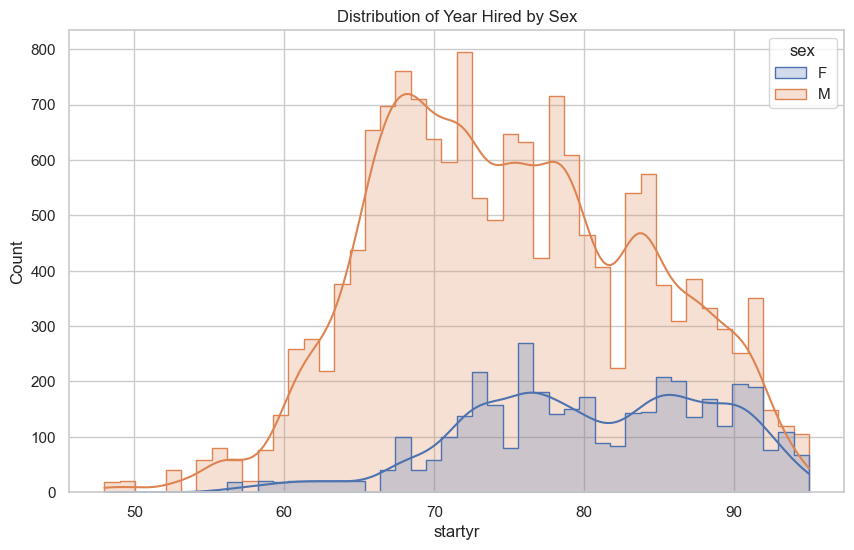

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='startyr', hue='sex', kde=True, element="step")
plt.title('Distribution of Year Hired by Sex')
plt.show()